In [62]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


### EDA

In [63]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target


In [64]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)

# Add a column for the target labels to the DataFrame
iris_df['Class'] = y

In [65]:
iris_df.shape

(150, 5)

In [66]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [68]:
import matplotlib.pyplot as plt

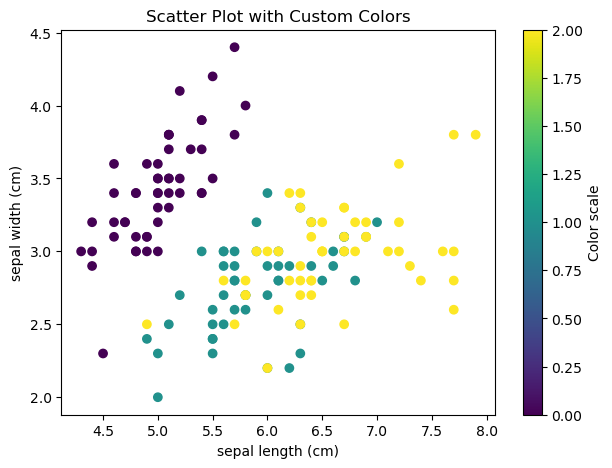

In [69]:
# Creating a scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['Class'])  

# Add labels and title
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Scatter Plot with Custom Colors')

# Show color bar
plt.colorbar(label='Color scale')

# Show plot
plt.show()

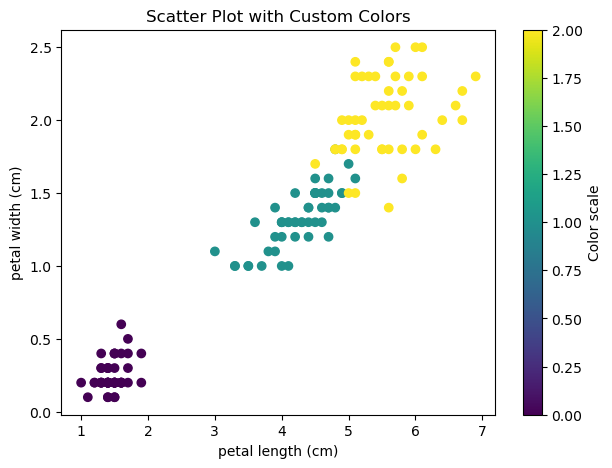

In [70]:
# Creating a scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['Class'])  

# Add labels and title
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Scatter Plot with Custom Colors')

# Show color bar
plt.colorbar(label='Color scale')

# Show plot
plt.show()

### t-SNE Plot

In [71]:
from sklearn.manifold import TSNE

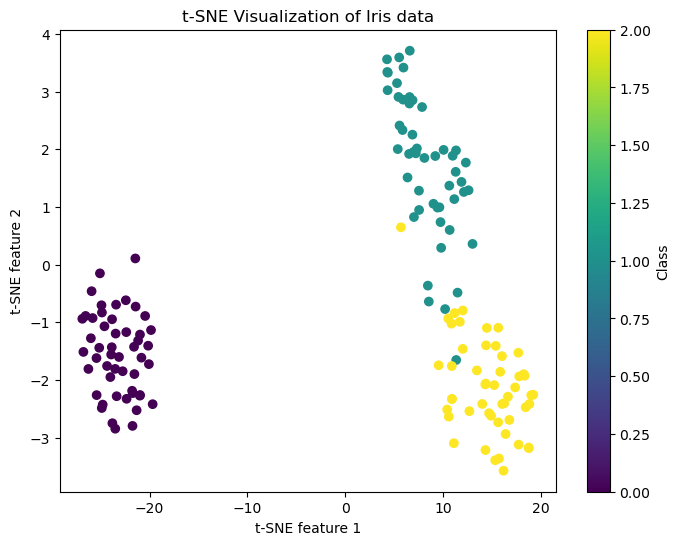

In [75]:
tsne = TSNE(n_components=2, random_state=42) # defining t-SNE with two dimensions

# defining data and transforming using t-SNE
data = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
transformed_data = tsne.fit_transform(data)

# Printing the figure
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=iris_df['Class'], cmap='viridis')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE Visualization of Iris data')
plt.colorbar(label='Class')
plt.show()

### Classification Using SVMs

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [48]:
train, test = train_test_split(iris_df, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [49]:
# Splitting the data into features and target variables
X = iris_df.drop('Class', axis=1)
y = iris_df['Class']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
model = svm.SVC() # selecting the algorithm

# fitting the model
model.fit(X_train,y_train)

# making the predictions
predictions=model.predict(X_test)

# printing accuracy, recall and precision
print('The accuracy of the SVM is:', accuracy_score(predictions, y_test))
print('The recall of the SVM is:', recall_score(predictions, y_test, average='macro'))
print('The precision of the SVM is:', precision_score(predictions, y_test, average='macro'))

The accuracy of the SVM is: 1.0
The recall of the SVM is: 1.0
The precision of the SVM is: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

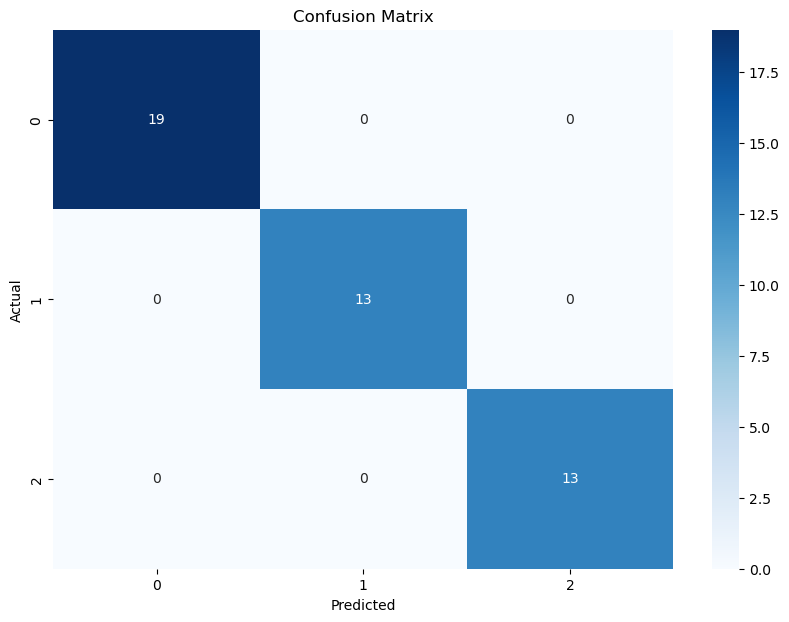

In [61]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
